In [1]:
import pandas as pd
import csv
import acquire
import prepare
import seaborn as sns
import numpy as np
from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire Fitbit data

In [2]:
df = acquire.merge_activities()

In [3]:
df.head()

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
1,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
2,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
3,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
4,2018-04-29,"2,851","1,639",0.77,0,891,122,0,0,602
5,2018-04-30,"2,825","1,323",0.62,0,880,104,0,0,540


In [4]:
df.shape

(225, 10)

# Preparation

In [5]:
df = prepare.update_dtypes(df)

In [6]:
df.dtypes

calories_burned             int64
steps                       int64
distance                  float64
 floors                     int64
minutes_sedentary           int64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories           int64
dtype: object

# Exploration

In [7]:
df.sort_values('steps',ascending=True)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
date,,,,,,,,,
2018-06-27,2145,0,0.00,0,1440,0,0,0,0
2018-07-04,2183,0,0.00,0,1438,2,0,0,42
2018-07-03,2144,0,0.00,0,1440,0,0,0,0
2018-06-30,2145,0,0.00,0,1440,0,0,0,0
2018-06-06,2145,0,0.00,0,1440,0,0,0,0
2018-06-07,2146,0,0.00,0,1440,0,0,0,0
2018-06-29,2180,0,0.00,0,1437,3,0,0,39
2018-06-11,2146,0,0.00,0,1440,0,0,0,0
2018-06-28,2145,0,0.00,0,1440,0,0,0,0


In [8]:
def peekatdata(df):
    print("\n \n SHAPE:")
    print(df.shape)

    print("\n \n COLS:")
    print(df.columns)

    print("\n \n INFO:")
    print(df.info())

    print("\n \n Missing Values:")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())

    print("\n \n DESCRIBE:")
    print(df.describe())

    print('\n \n HEAD:')
    print(df.head(5))

    print('\n \n TAIL:' )
    print(df.tail(5))

peekatdata(df)


 
 SHAPE:
(225, 9)

 
 COLS:
Index(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary',
       'minutes_lightly_active', 'minutes_fairly_active',
       'minutes_very_active', 'activity_calories'],
      dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
calories_burned           225 non-null int64
steps                     225 non-null int64
distance                  225 non-null float64
 floors                   225 non-null int64
minutes_sedentary         225 non-null int64
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB
None

 
 Missing Values:
calories_burned           0
steps                     0
distance                  0
 floors                   0
minutes_sedentary         0
min

In [9]:
df.describe()

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000


In [10]:
def missing_values_col(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})

missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
calories_burned,0,0.0,0,0.0,0,0.0
steps,0,0.0,0,0.0,0,0.0
distance,0,0.0,0,0.0,0,0.0
floors,0,0.0,0,0.0,0,0.0
minutes_sedentary,0,0.0,0,0.0,0,0.0
minutes_lightly_active,0,0.0,0,0.0,0,0.0
minutes_fairly_active,0,0.0,0,0.0,0,0.0
minutes_very_active,0,0.0,0,0.0,0,0.0
activity_calories,0,0.0,0,0.0,0,0.0


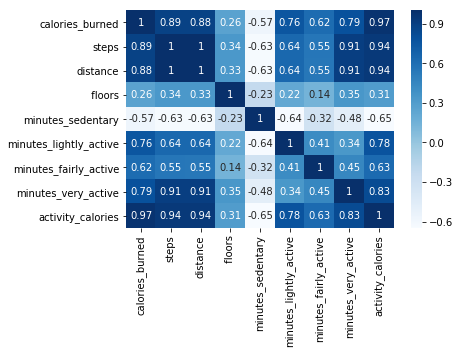

In [11]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)


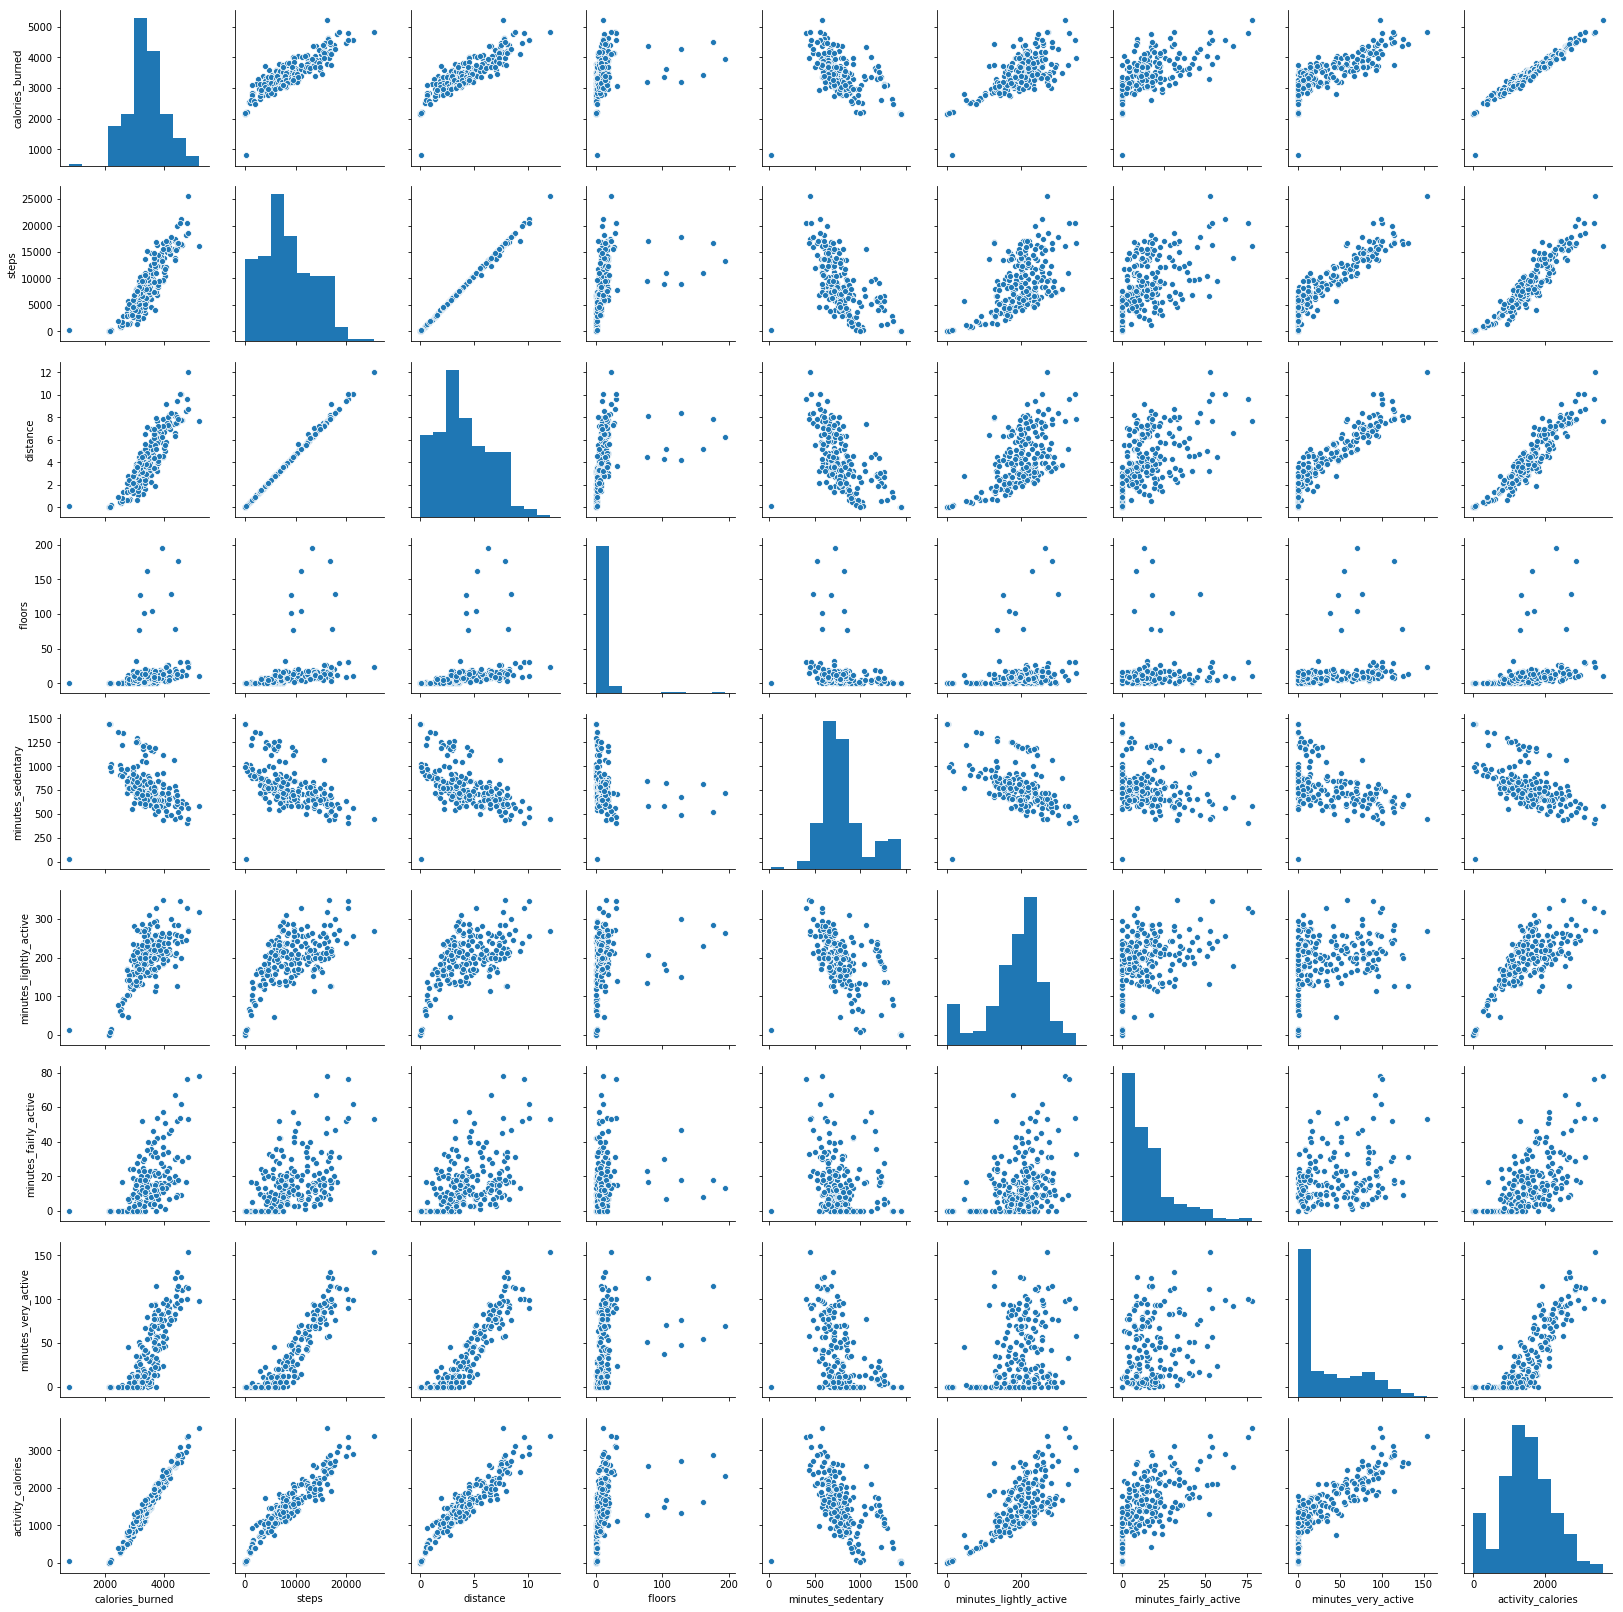

In [12]:
sns.pairplot(df)

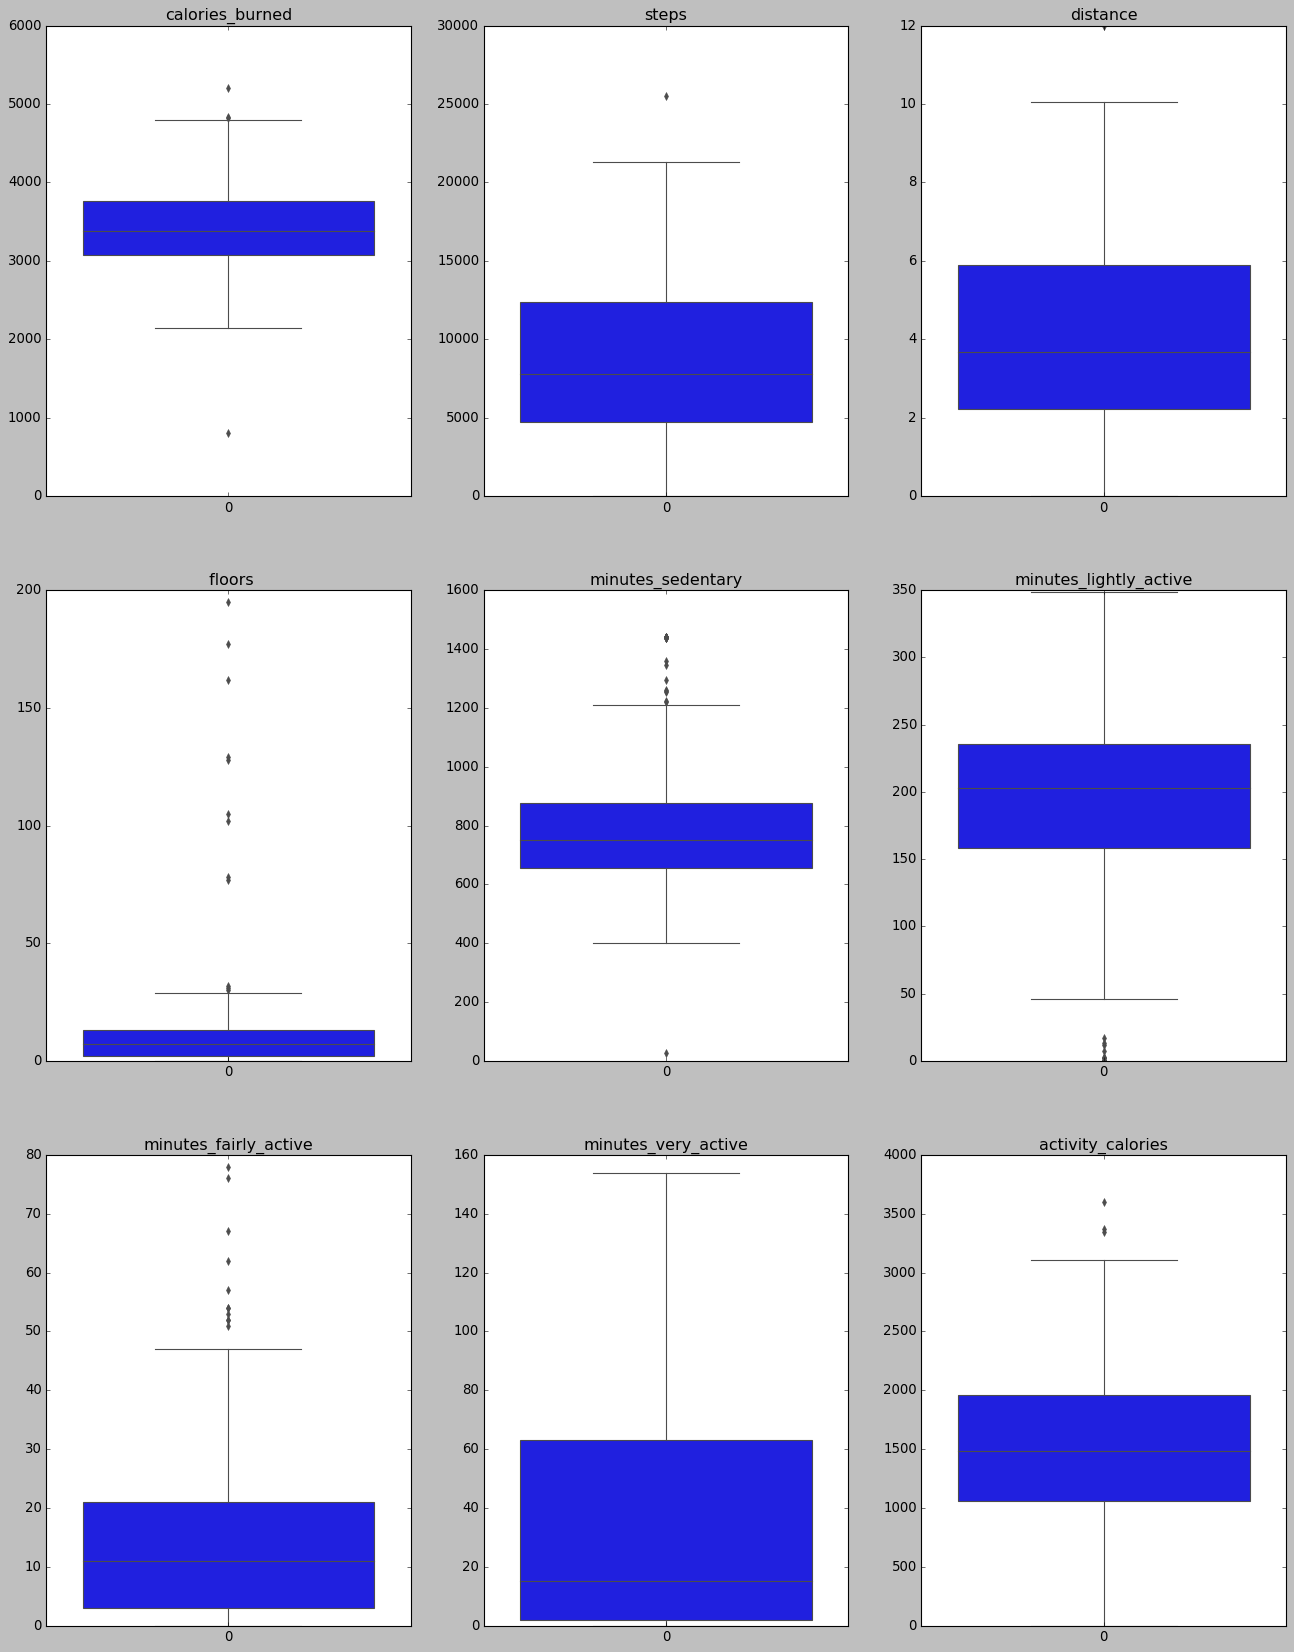

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')


plt.figure(figsize=(20, 25))

for i, col in enumerate(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary','minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active','activity_calories']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    sns.boxplot(data=series)

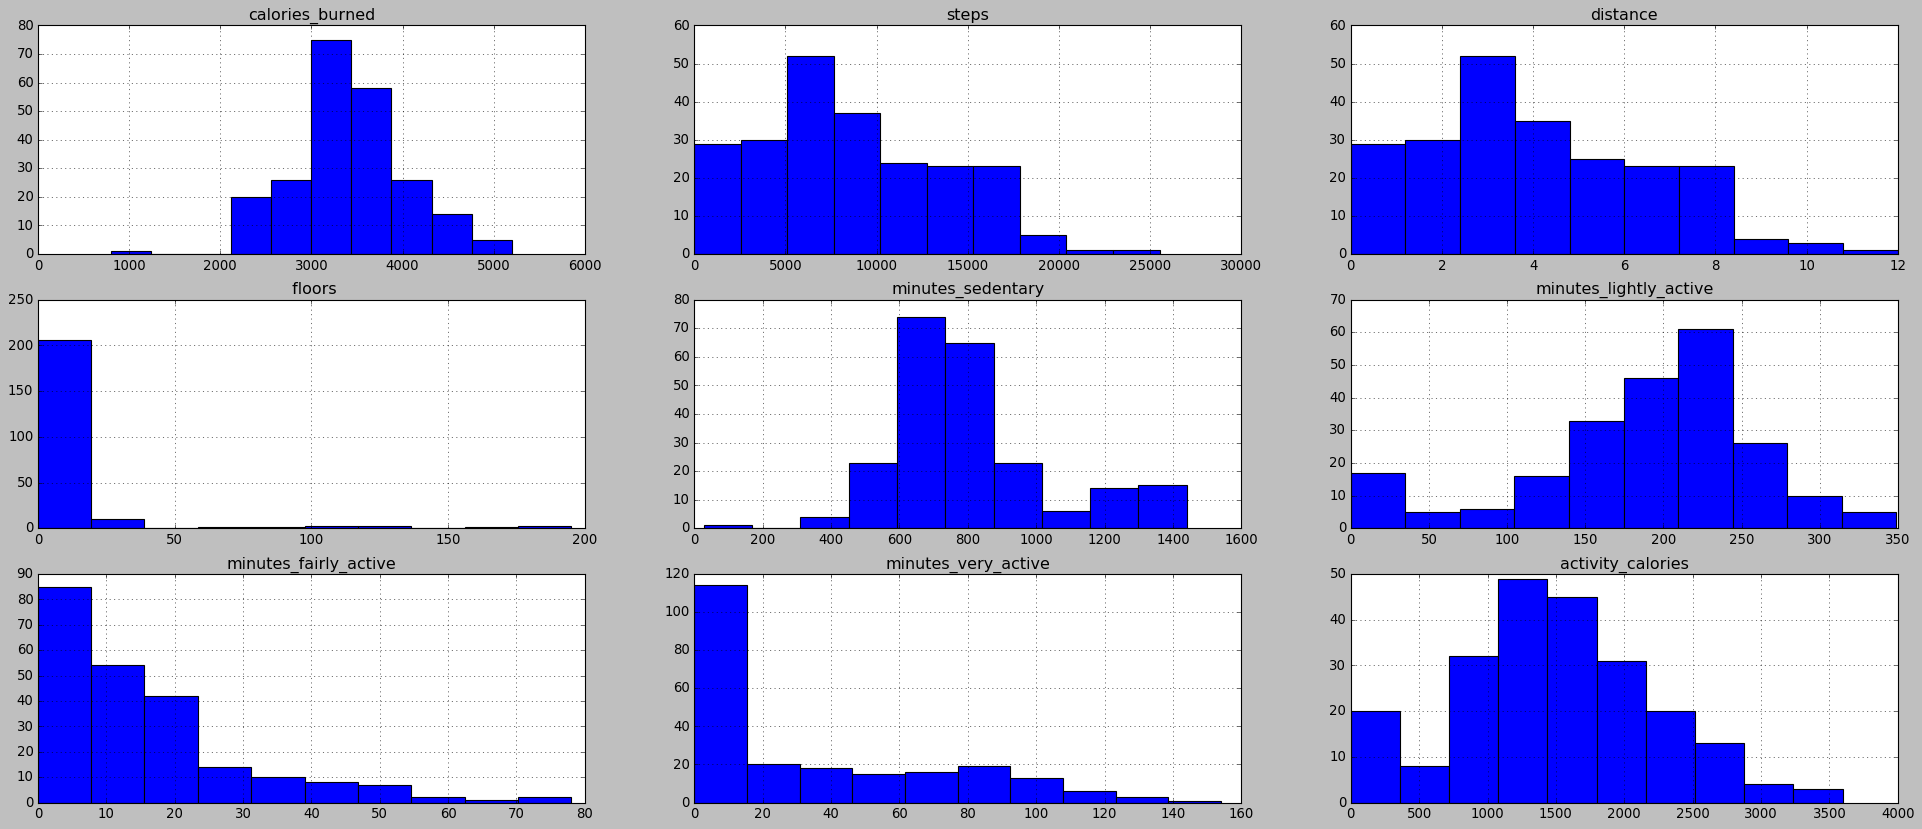

In [14]:
plt.figure(figsize=(30, 25))
for i, col in enumerate(['calories_burned', 'steps', 'distance', ' floors', 'minutes_sedentary','minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active','activity_calories']):  
    plot_number = i + 1  # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(6, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

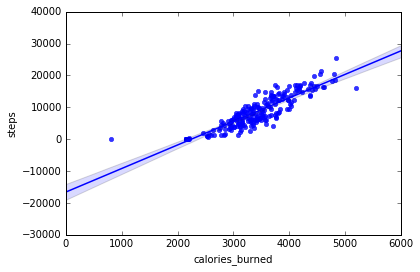

In [101]:
ax = sns.regplot(x="calories_burned", y="steps", data=df)

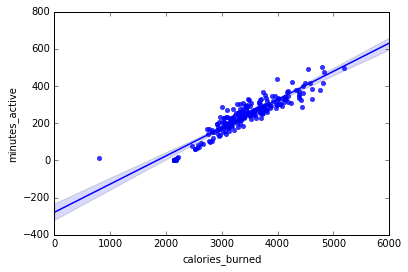

In [102]:
ax = sns.regplot(x="calories_burned", y="minutes_active", data=df)

# train test split

In [15]:
train = df[:'2018-10-31']
test = df['2018-11-01':]
print(train.nunique())
print(test.nunique())

calories_burned           172
steps                     177
distance                  158
 floors                    30
minutes_sedentary         153
minutes_lightly_active    119
minutes_fairly_active      49
minutes_very_active        75
activity_calories         172
dtype: int64
calories_burned           36
steps                     36
distance                  35
 floors                   24
minutes_sedentary         34
minutes_lightly_active    30
minutes_fairly_active     23
minutes_very_active       29
activity_calories         36
dtype: int64


In [16]:
calories = train.resample('D').calories_burned.mean()

In [17]:
calories.head()

date
2018-04-26    2635
2018-04-27    3649
2018-04-28    3379
2018-04-29    2851
2018-04-30    2825
Freq: D, Name: calories_burned, dtype: int64

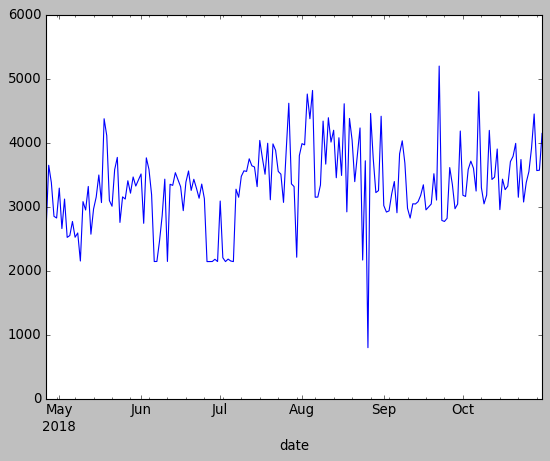

In [18]:
calories.plot() # plot daily mean

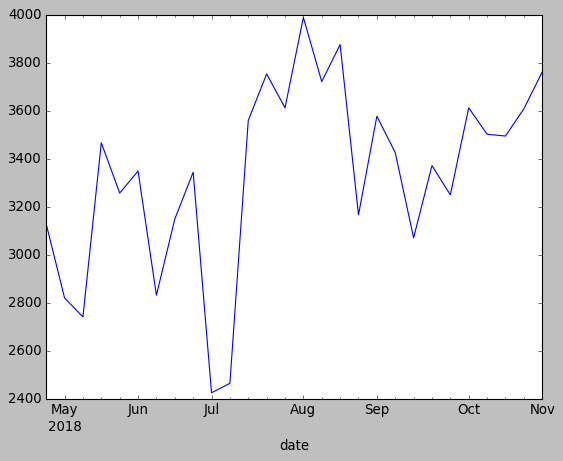

In [19]:
calories.resample('W').mean().plot() # plot weekly mean

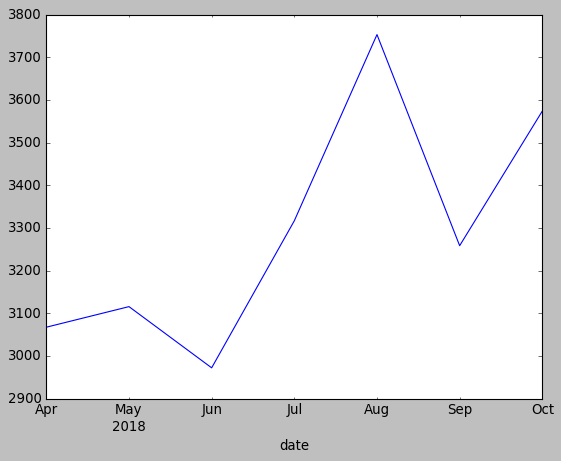

In [20]:
calories.resample('MS').mean().plot() # plot monthly mean

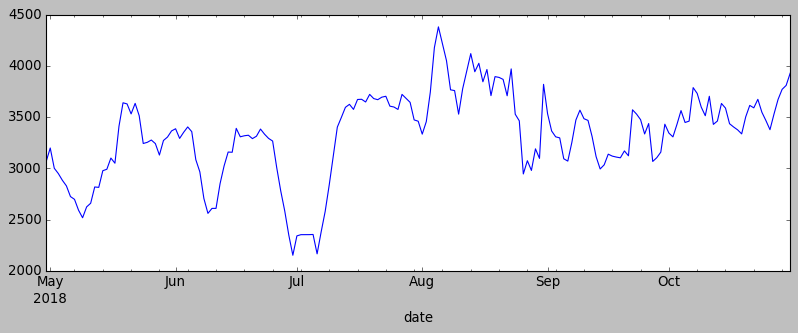

In [21]:
calories.rolling(5).mean().plot(figsize=(12, 4))
# computing the 5-period rolling mean

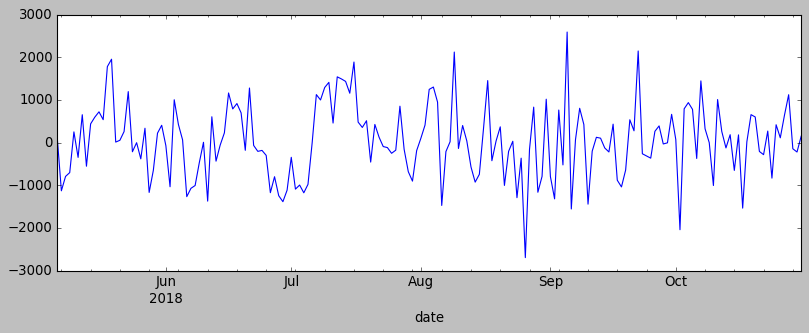

In [22]:
calories.diff(periods=10).plot(figsize=(12, 4))
# compute the 10-period difference and plot

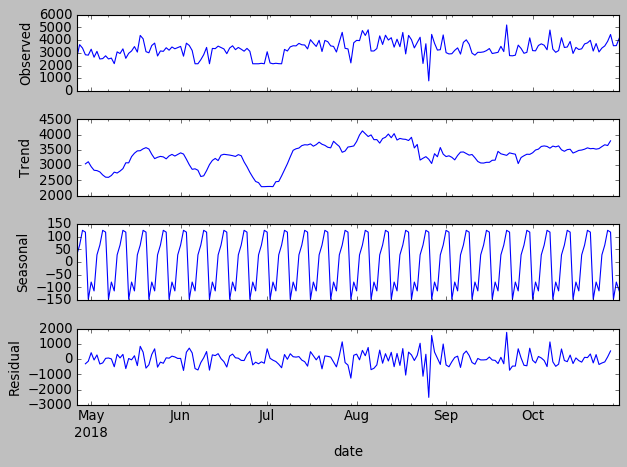

In [23]:
# Time-series decomposition: Plot trend, seasonality, and noise
from pylab import rcParams
decomposition = sm.tsa.seasonal_decompose(calories, model='additive')
fig = decomposition.plot()
plt.show()

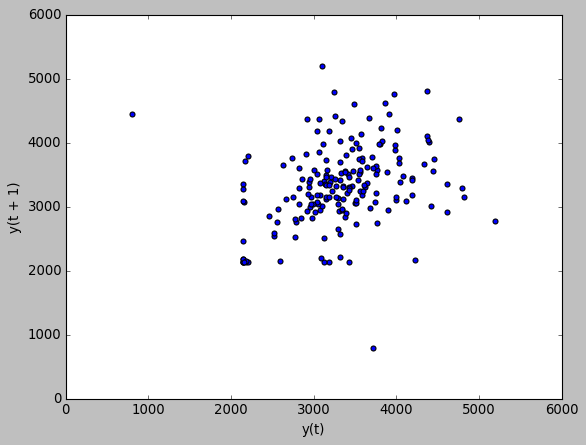

In [24]:
# Plot the measure (t) on the x-axis against the sales at the 
# previous time step (t-1)
pd.plotting.lag_plot(calories)

In [25]:
# Use pearson's correlation coefficient to test correlation
df_corr = pd.concat([calories.shift(1), calories], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.305737
t+1  0.305737  1.000000


# Feature Engineering

In [26]:
# Add column that combines all activity minutes
def add_minutes_active_column(df):
    df['minutes_active'] = (df.minutes_lightly_active + df.minutes_fairly_active + df.minutes_very_active)

In [27]:
add_minutes_active_column(df)

In [28]:
df.head()

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutes_active
date,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,93
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,282
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,188
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,122
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,104


In [29]:
# df1 = df[df['calories_burned']>=1]

# Modeling

In [30]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Predicting using sampling option 1: date cutoff

In [31]:
aggregation = 'mean' # we might switch this for sum
train = df[:'2018-10-31'].calories_burned.resample('D').agg(aggregation)
test = df['2018-11-01':].calories_burned.resample('D').agg(aggregation)

In [32]:
print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 225
Training Observations: 189
Testing Observations: 36


In [33]:
pd.concat([train.head(3), train.tail(3)])

date
2018-04-26    2635
2018-04-27    3649
2018-04-28    3379
2018-10-29    3566
2018-10-30    3572
2018-10-31    4147
Name: calories_burned, dtype: int64

In [34]:
pd.concat([test.head(3), test.tail(3)])

date
2018-11-01    3448
2018-11-02    4126
2018-11-03    4174
2018-12-04    3384
2018-12-05    3670
2018-12-06    3669
Name: calories_burned, dtype: int64

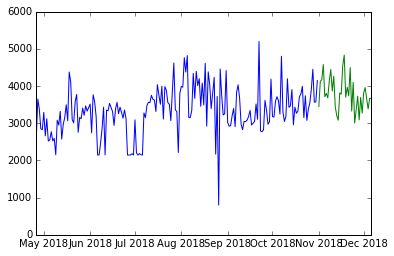

In [35]:
plt.plot(train)
plt.plot(test)
plt.show()

## Predicting using sampling option 2: percent split

In [36]:
data = df.calories_burned.resample('D').agg(aggregation)
# X=series.values

In [37]:
train_size = int(len(data) * 0.66)
train_1, test_1 = data[0:train_size], data[train_size:len(data)]
print('Observations: %d' % (len(data)))
print('Training Observations: %d' % (len(train_1)))
print('Testing Observations: %d' % (len(test_1)))

Observations: 225
Training Observations: 148
Testing Observations: 77


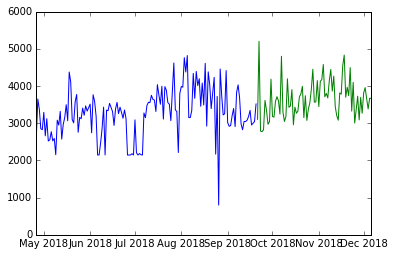

In [38]:
plt.plot(train_1)
plt.plot(test_1)
plt.show()

## Prediciting using simple average

In [39]:
yhat = pd.DataFrame(dict(actual=test))

In [40]:
yhat['avg_forecast'] = train.mean()

In [41]:
yhat.head()

,actual,avg_forecast
date,,
2018-11-01,3448,3327.433862
2018-11-02,4126,3327.433862
2018-11-03,4174,3327.433862
2018-11-04,4578,3327.433862
2018-11-05,3710,3327.433862


In [42]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual=test, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()    

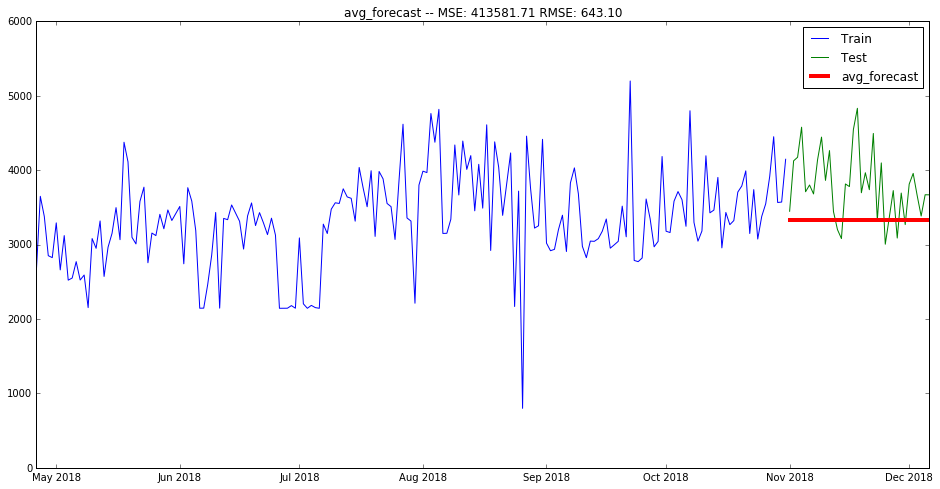

In [43]:
plot_and_eval(yhat.avg_forecast)

## Predicting using moving average

In [44]:
periods = 12
yhat['moving_avg_forecast_12'] = train.rolling(12).mean().iloc[-1]

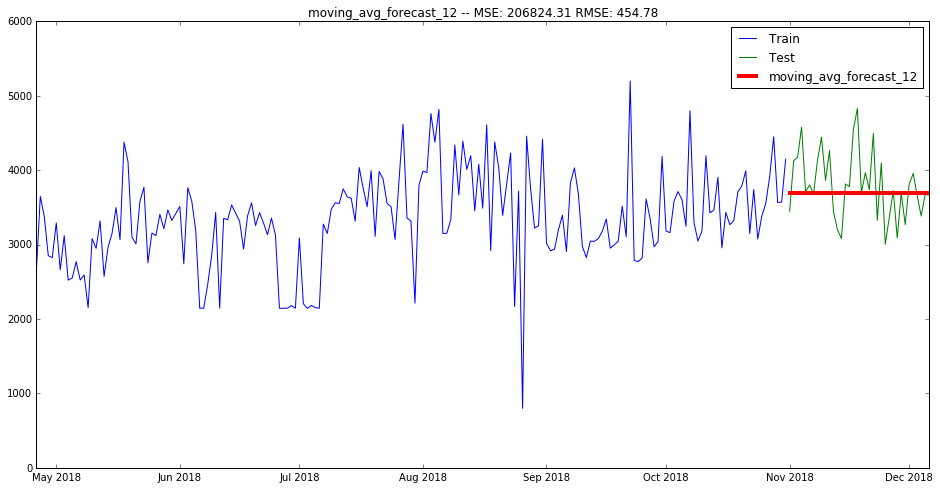

In [45]:
plot_and_eval(yhat.moving_avg_forecast_12)

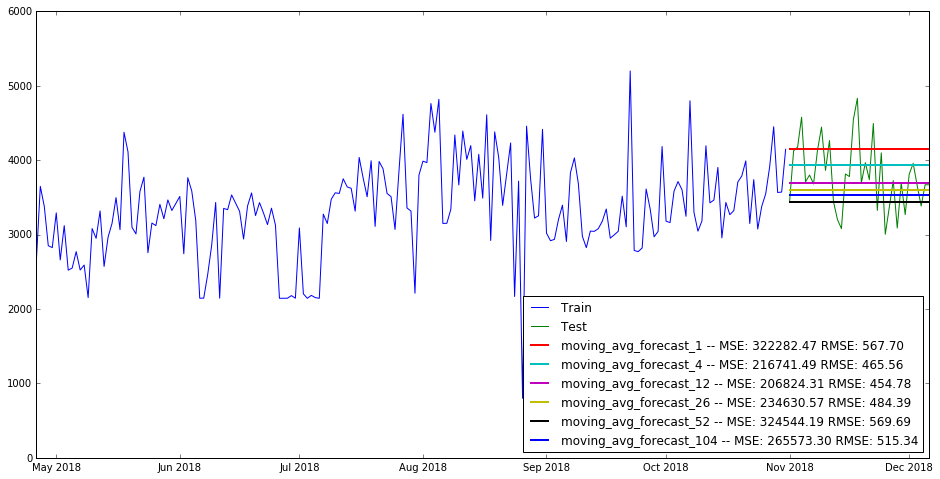

In [46]:
period_vals = [1, 4, 12, 26, 52, 104]

for periods in period_vals:
    yhat[f'moving_avg_forecast_{periods}'] = train.rolling(periods).mean().iloc[-1]

forecasts = [yhat[f'moving_avg_forecast_{p}'] for p in period_vals]

plot_and_eval(forecasts, linewidth=2)

## Predicting using holts linear trend model

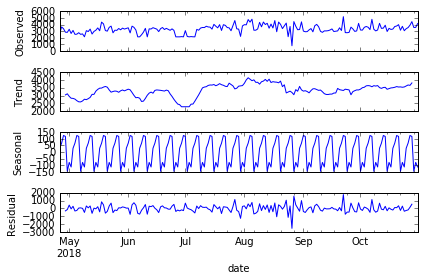

In [47]:
import statsmodels.api as sm

_ = sm.tsa.seasonal_decompose(train.resample('D').mean()).plot()

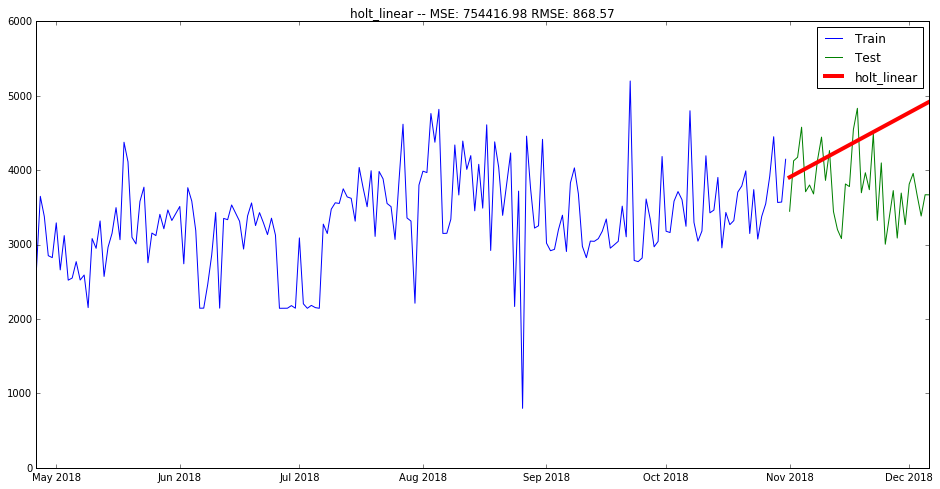

In [48]:
from statsmodels.tsa.api import Holt

model = Holt(train).fit(smoothing_level=.3, smoothing_slope=.1)

yhat['holt_linear'] = model.forecast(test.shape[0])
plot_and_eval(yhat.holt_linear)

## Predicting using prophet - calories_burned

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from fbprophet import Prophet

In [50]:
df1 = df[df['calories_burned']>=1]
df1 = df1.reset_index()

In [51]:
df1['y'] = df1.calories_burned
df1['ds'] = pd.to_datetime(df1.date)
df1 = df1.groupby(['ds'])['y'].sum().reset_index()
#df1 = df1.groupby(['ds']).y.sum().asfreq('D').reset_index()

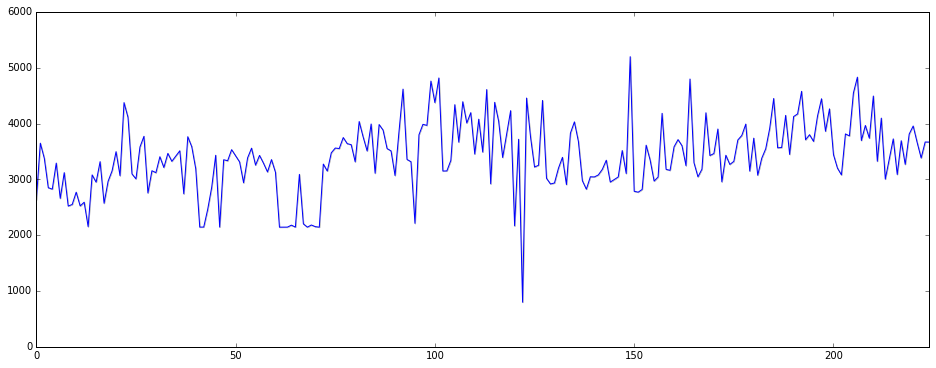

In [52]:
plt.figure(figsize=(16,6))
sns.tsplot(df1.y)

In [53]:
# Create an instance of the Prophet class and then fit our dataframe to it
df1['cap'] = 5500
df1['floor'] = 100
m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9,yearly_seasonality=True)
m.fit(df1)

In [54]:
# Create a 'future' dataframe

In [55]:
future = m.make_future_dataframe(periods=14)
future['cap'] = 5500
future['floor'] = 100
print(future.head())
print(future.tail())
print(df1.tail())

          ds   cap  floor
0 2018-04-26  5500    100
1 2018-04-27  5500    100
2 2018-04-28  5500    100
3 2018-04-29  5500    100
4 2018-04-30  5500    100
            ds   cap  floor
234 2018-12-16  5500    100
235 2018-12-17  5500    100
236 2018-12-18  5500    100
237 2018-12-19  5500    100
238 2018-12-20  5500    100
            ds     y   cap  floor
220 2018-12-02  3957  5500    100
221 2018-12-03  3660  5500    100
222 2018-12-04  3384  5500    100
223 2018-12-05  3670  5500    100
224 2018-12-06  3669  5500    100


In [56]:
# predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast_calories_burned = forecast[['yhat','ds']]
forecast_calories_burned.tail(14)

,yhat,ds
225,3896.033533,2018-12-07
226,4024.713059,2018-12-08
227,4060.503980,2018-12-09
228,3781.295225,2018-12-10
229,3876.690910,2018-12-11
230,3871.562132,2018-12-12
231,4066.149496,2018-12-13
232,4140.233556,2018-12-14
233,4247.514061,2018-12-15
234,4256.811018,2018-12-16


In [57]:
df1.head()

,ds,y,cap,floor
0,2018-04-26,2635,5500,100
1,2018-04-27,3649,5500,100
2,2018-04-28,3379,5500,100
3,2018-04-29,2851,5500,100
4,2018-04-30,2825,5500,100


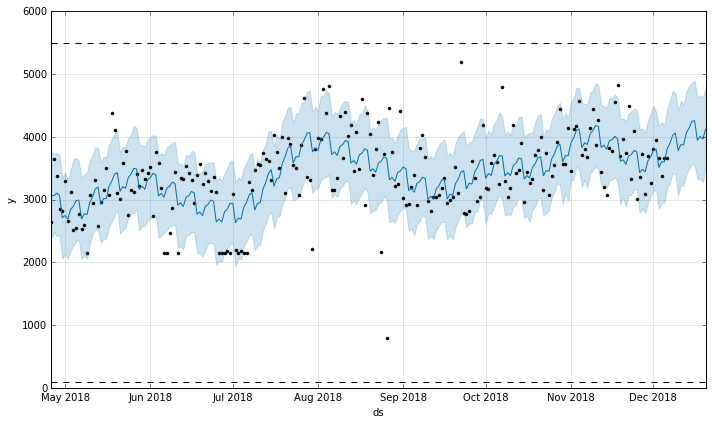

In [58]:
# plot
fig1 = m.plot(forecast)

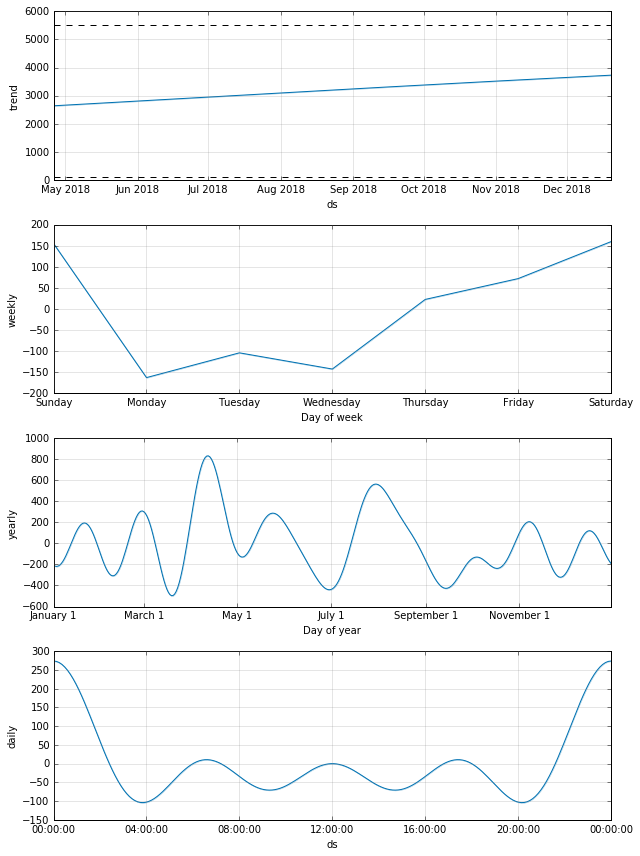

In [59]:
fig2 = m.plot_components(forecast)

In [60]:
# Evaluate
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='14 days')

df_p = performance_metrics(df_cv, rolling_window=1)
df_p.head()


INFO:fbprophet:Making 25 forecasts with cutoffs between 2018-06-07 00:00:00 and 2018-11-22 00:00:00


,horizon,mse,rmse,mae,mape,coverage
349,14 days,2.488386e+06,1577.461936,1239.888584,0.387995,0.325714


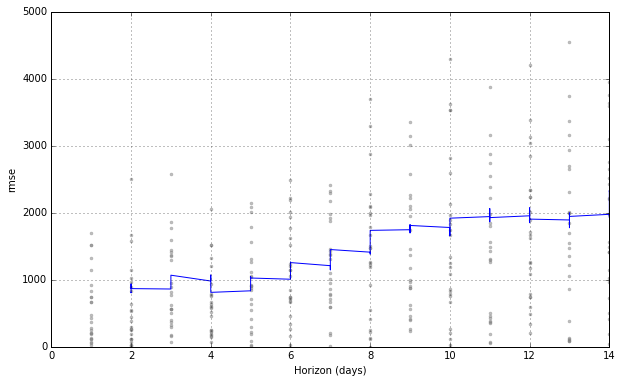

In [61]:
# plot_forecast_component(m, forecast, 'yhat')
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

## Predicting using prophet - steps

In [62]:
df2 = df[df['steps']>=1]
df2 = df2.reset_index()

In [63]:
df2['y'] = df2.steps
df2['ds'] = pd.to_datetime(df2.date)
df2 = df2.groupby(['ds'])['y'].sum().reset_index()
#df1 = df1.groupby(['ds']).y.sum().asfreq('D').reset_index()

In [64]:
df2.head()

,ds,y
0,2018-04-26,2931
1,2018-04-27,9971
2,2018-04-28,3521
3,2018-04-29,1639
4,2018-04-30,1323


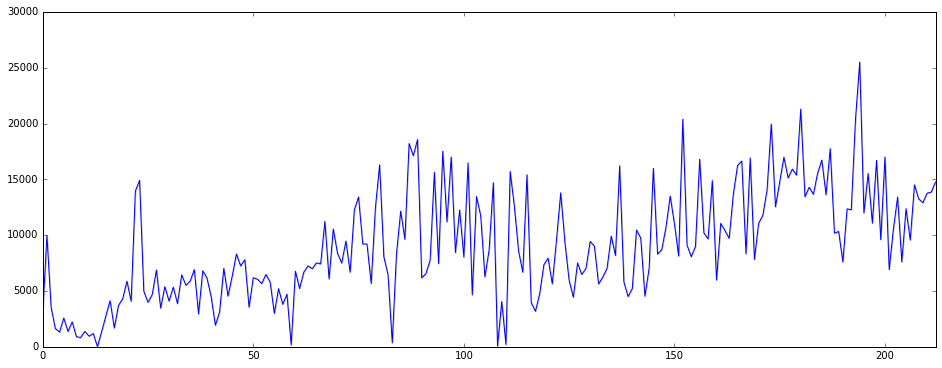

In [65]:
plt.figure(figsize=(16,6))
sns.tsplot(df2.y)

In [66]:
df2['cap'] = 25000
df2['floor'] = 100
m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9,yearly_seasonality=True)
m.fit(df2)

In [67]:
future = m.make_future_dataframe(periods=14)
future['cap'] = 25000
future['floor'] = 100
print(future.head())
print(future.tail())
print(df2.tail())

          ds    cap  floor
0 2018-04-26  25000    100
1 2018-04-27  25000    100
2 2018-04-28  25000    100
3 2018-04-29  25000    100
4 2018-04-30  25000    100
            ds    cap  floor
222 2018-12-16  25000    100
223 2018-12-17  25000    100
224 2018-12-18  25000    100
225 2018-12-19  25000    100
226 2018-12-20  25000    100
            ds      y    cap  floor
208 2018-12-02  13257  25000    100
209 2018-12-03  12915  25000    100
210 2018-12-04  13763  25000    100
211 2018-12-05  13865  25000    100
212 2018-12-06  14774  25000    100


In [68]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
forecast_steps = forecast[['yhat','ds']]
forecast_steps.tail(14)

,yhat,ds
213,15423.942493,2018-12-07
214,16340.441523,2018-12-08
215,16898.745609,2018-12-09
216,14823.053293,2018-12-10
217,16041.341909,2018-12-11
218,16281.158676,2018-12-12
219,18016.314119,2018-12-13
220,18473.257789,2018-12-14
221,19248.057468,2018-12-15
222,19611.603419,2018-12-16


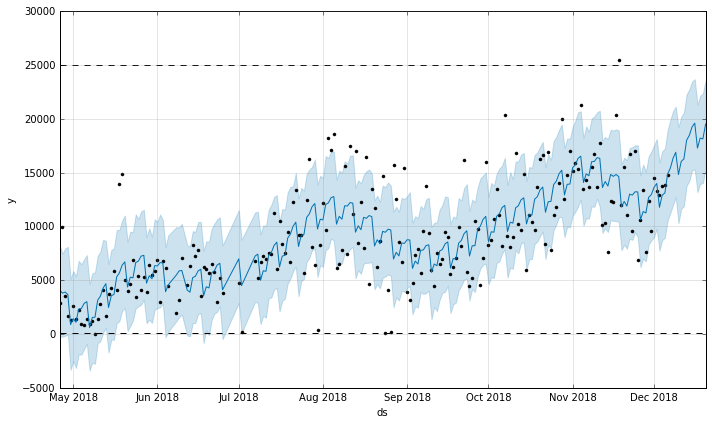

In [69]:
fig1 = m.plot(forecast)

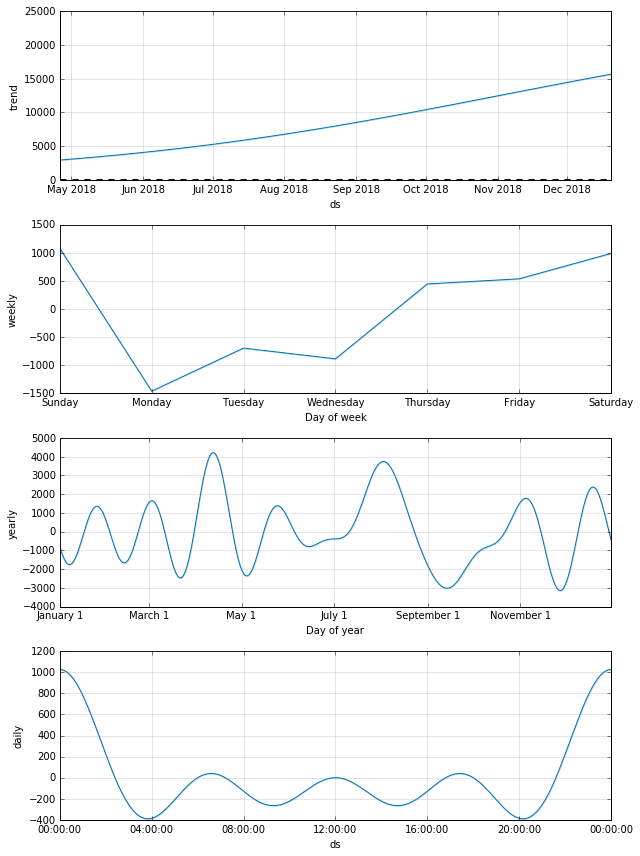

In [70]:
fig2 = m.plot_components(forecast)

In [71]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='14 days')

df_p = performance_metrics(df_cv, rolling_window=1)

INFO:fbprophet:Making 25 forecasts with cutoffs between 2018-06-07 00:00:00 and 2018-11-22 00:00:00


In [72]:
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
330,14 days,4.427940e+07,6654.276639,5269.008999,2.411709,0.441088


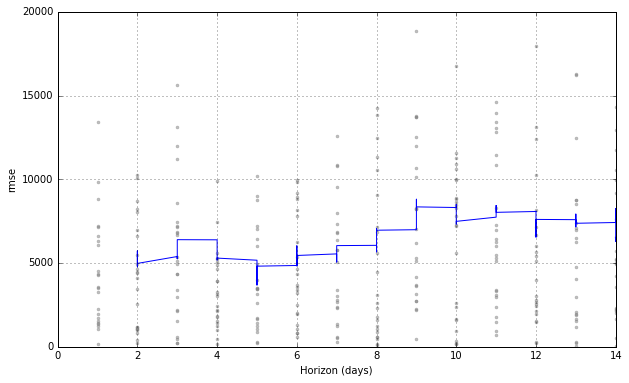

In [73]:
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

## Prediciting using prophet - minutes_active

In [74]:
df4 = df[df['minutes_active']>=0]
df4 = df4.reset_index()

In [75]:
df4['y'] = df4.minutes_active
df4['ds'] = pd.to_datetime(df4.date)
df4 = df4.groupby(['ds'])['y'].sum().reset_index()
#df1 = df1.groupby(['ds']).y.sum().asfreq('D').reset_index()

In [76]:
df4.head()

,ds,y
0,2018-04-26,93
1,2018-04-27,282
2,2018-04-28,188
3,2018-04-29,122
4,2018-04-30,104


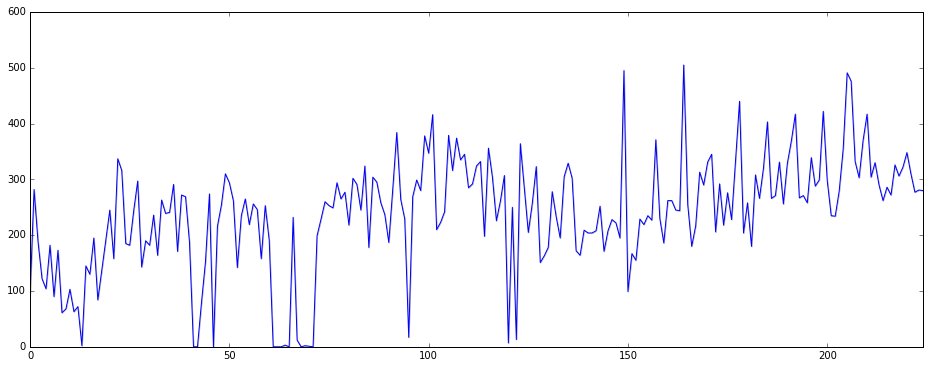

In [77]:
plt.figure(figsize=(16,6))
sns.tsplot(df4.y)

In [78]:
df4['cap'] = 1400
df4['floor'] = 100
m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9,yearly_seasonality=True)
m.fit(df4)

In [79]:
future = m.make_future_dataframe(periods=14)
future['cap'] = 50
future['floor'] = 20
print(future.head())
print(future.tail())
print(df4.tail())

          ds  cap  floor
0 2018-04-26   50     20
1 2018-04-27   50     20
2 2018-04-28   50     20
3 2018-04-29   50     20
4 2018-04-30   50     20
            ds  cap  floor
234 2018-12-16   50     20
235 2018-12-17   50     20
236 2018-12-18   50     20
237 2018-12-19   50     20
238 2018-12-20   50     20
            ds    y   cap  floor
220 2018-12-02  348  1400    100
221 2018-12-03  310  1400    100
222 2018-12-04  277  1400    100
223 2018-12-05  281  1400    100
224 2018-12-06  280  1400    100


In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(58)
forecast_minactive = forecast[['yhat','ds']]
forecast_minactive.tail(14)

,yhat,ds
225,52.539269,2018-12-07
226,74.086761,2018-12-08
227,88.527434,2018-12-09
228,23.021819,2018-12-10
229,33.371685,2018-12-11
230,27.723266,2018-12-12
231,56.303760,2018-12-13
232,60.507491,2018-12-14
233,84.291249,2018-12-15
234,100.649597,2018-12-16


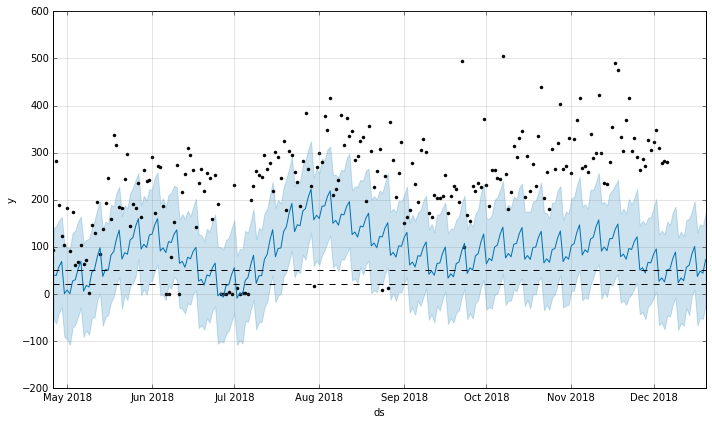

In [81]:
fig1 = m.plot(forecast)

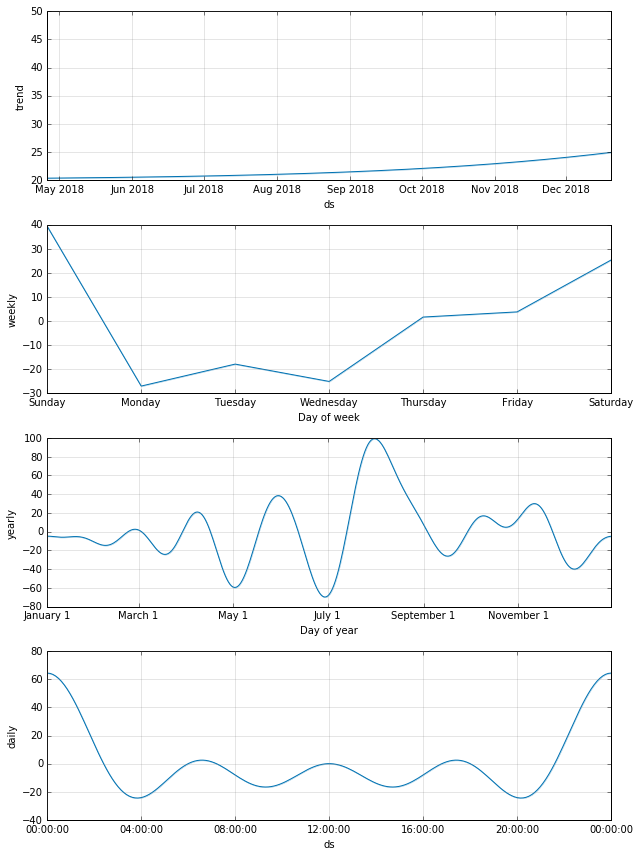

In [82]:
fig2 = m.plot_components(forecast)

In [83]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='14 days')

df_p = performance_metrics(df_cv, rolling_window=1)

INFO:fbprophet:Making 25 forecasts with cutoffs between 2018-06-07 00:00:00 and 2018-11-22 00:00:00


In [84]:
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
349,14 days,48590.49368,220.432515,148.191641,inf,0.565714


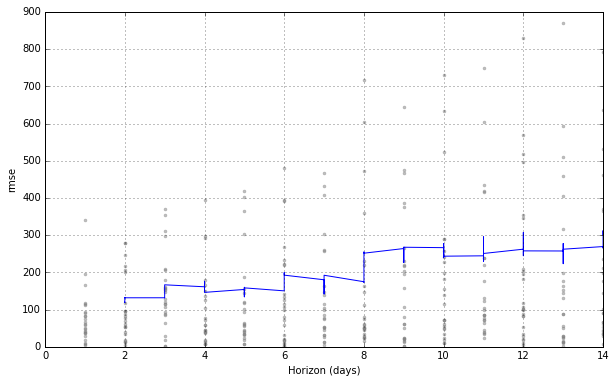

In [85]:
# plot_forecast_component(m, forecast, 'yhat')
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

# Prediciting using prophet - min_sedentary

In [86]:
df3 = df[df['minutes_sedentary']>=0]
df3 = df3.reset_index()

In [87]:
df3['y'] = df3.minutes_sedentary
df3['ds'] = pd.to_datetime(df3.date)
df3 = df3.groupby(['ds'])['y'].sum().reset_index()
#df1 = df1.groupby(['ds']).y.sum().asfreq('D').reset_index()

In [88]:
df3.head()

,ds,y
0,2018-04-26,1347
1,2018-04-27,1158
2,2018-04-28,702
3,2018-04-29,891
4,2018-04-30,880


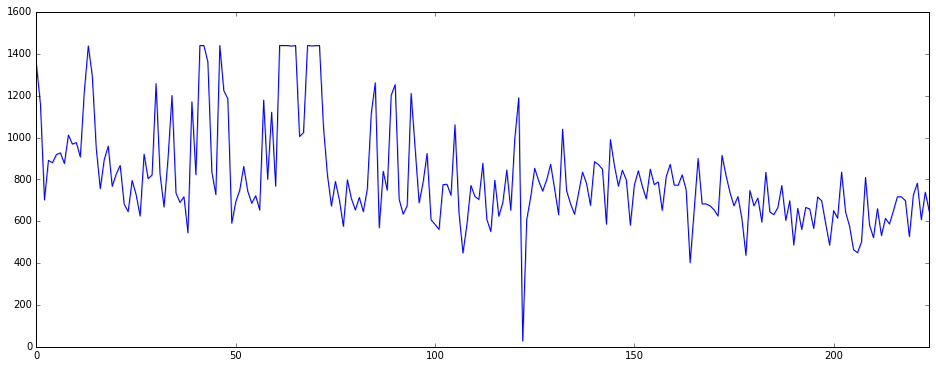

In [89]:
plt.figure(figsize=(16,6))
sns.tsplot(df3.y)

In [90]:
df3['cap'] = 1400
df3['floor'] = 100
m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9,yearly_seasonality=True)
m.fit(df3)

In [91]:
future = m.make_future_dataframe(periods=14)
future['cap'] = 1400
future['floor'] = 100
print(future.head())
print(future.tail())
print(df3.tail())

          ds   cap  floor
0 2018-04-26  1400    100
1 2018-04-27  1400    100
2 2018-04-28  1400    100
3 2018-04-29  1400    100
4 2018-04-30  1400    100
            ds   cap  floor
234 2018-12-16  1400    100
235 2018-12-17  1400    100
236 2018-12-18  1400    100
237 2018-12-19  1400    100
238 2018-12-20  1400    100
            ds    y   cap  floor
220 2018-12-02  725  1400    100
221 2018-12-03  782  1400    100
222 2018-12-04  608  1400    100
223 2018-12-05  739  1400    100
224 2018-12-06  647  1400    100


In [92]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(58)
forecast_minsedentary = forecast[['yhat','ds']]
forecast_minsedentary.tail(14)

,yhat,ds
225,634.684423,2018-12-07
226,520.139559,2018-12-08
227,475.210691,2018-12-09
228,553.372347,2018-12-10
229,576.441425,2018-12-11
230,613.059154,2018-12-12
231,559.391159,2018-12-13
232,527.555062,2018-12-14
233,408.075084,2018-12-15
234,359.344734,2018-12-16


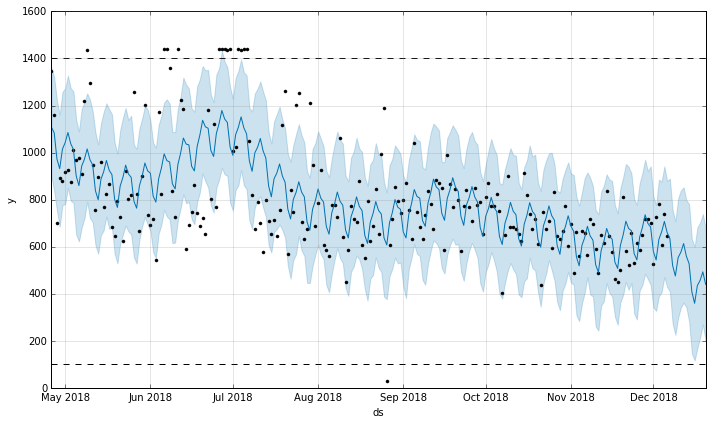

In [93]:
fig1 = m.plot(forecast)

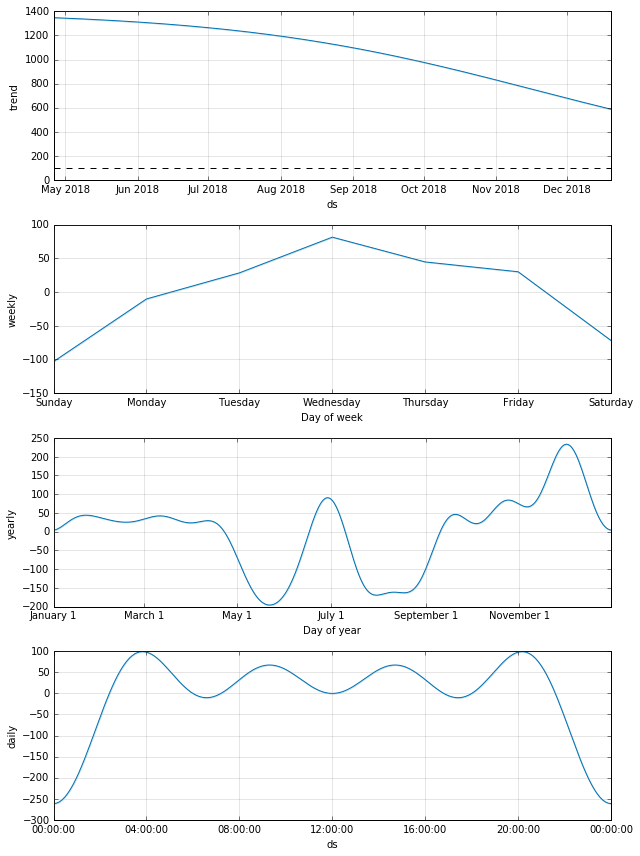

In [94]:
fig2 = m.plot_components(forecast)

In [95]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='14 days')

df_p = performance_metrics(df_cv,rolling_window=1)

INFO:fbprophet:Making 25 forecasts with cutoffs between 2018-06-07 00:00:00 and 2018-11-22 00:00:00


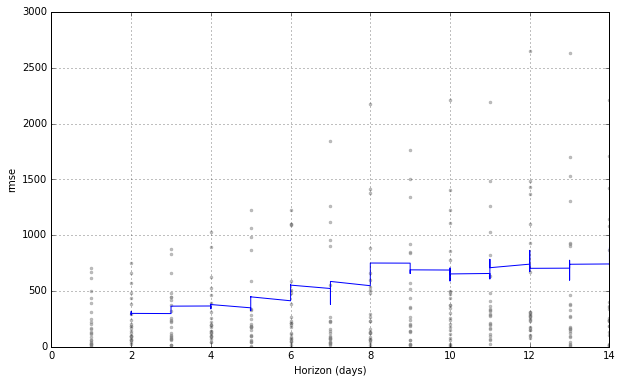

In [96]:
# plot_forecast_component(m, forecast, 'yhat')
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

# merge yhat dataframes and turn into csv

In [106]:
def merge_yhats():
    forecast_minactive.rename(index=str, columns={'yhat':'minutes_active_pred', 'ds':'date'}, inplace=True)
    forecast_minsedentary.rename(index=str, columns={'yhat':'minutes_sedentary_pred','ds':'date1'}, inplace=True)
    forecast_steps.rename(index=str, columns={'yhat':'steps_pred','ds':'date2'}, inplace=True)
    forecast_calories_burned.rename(index=str, columns={'yhat':'calories_burned_pred','ds':'date3'}, inplace=True)
    frames = [forecast_minactive, forecast_minsedentary, forecast_steps, forecast_calories_burned]
    df_preds = pd.concat(frames, axis=1)
    df_preds = df_preds.drop(['date1','date1','date2','date3'], axis=1)
    df_preds.set_index('date', inplace=True)
    df_preds = df_preds.tail(14)
    df_preds.to_csv('fitbit_preds.csv')
    return df_preds

In [107]:
df_preds = merge_yhats()

In [108]:
df_preds

,minutes_active_pred,minutes_sedentary_pred,steps_pred,calories_burned_pred
date,,,,
2018-07-22,191.897825,717.717913,12193.842451,3860.534699
2018-07-23,131.849346,800.785692,12682.207129,3586.320367
2018-07-24,146.665240,830.674095,12779.651993,3684.754527
2018-05-05,52.826512,900.770562,2849.128163,2985.238469
2018-07-25,144.490000,875.852769,10220.046741,3681.249979
2018-07-26,175.564975,832.285861,10941.361959,3876.582234
2018-07-27,181.313542,811.864773,10681.199861,3951.041017
2018-07-28,205.735172,704.868419,11923.226028,4058.791427
2018-07-29,221.879187,669.431908,11903.289470,4069.058316
